# Voluntary Problem Set

This problem set allows you to play around with concepts from class and to solve some smaller subproblems on your own.

Additional guidance is provided for concepts that did not make into our class discussion. 

# Topic: Testing whether one earns a daily risk premium in equity for exposure to volatility innovations

 

# Your Learning Points

you will practice 

- concepts of previous voluntary problem sets: Fama-MacBeth, Extracting Vol Shocks
$$
\\
$$

- High level introduction to the Intertemporal CAPM (in short: I-CAPM)
 

# Theory supporting what we are asked to do in the Problem Set

The CAPM postulates that positive (negative) exposure to market risk is the only reason why a stock pays a return that is on average higher (lower) than the risk-free rate.

Nobel laureate Prof. Robert Merton extends this theory to a dynamic context, using stochastic calculus. He shows that in a multiperiod context, not only market risk, but also exposure to factors that drive the level or slope of the Capital Allocation Line, is compensated by a risk premium. That theory is called Intertemporal CAPM or I-CAPM for short.

If you want to let you financial data science work be guided by economic theory, it is worthwhile to follow the thinking of the I-CAPM. Namely, a systematic risk factor that is not the market factor needs to drive level or slope of the Capital Allocation Line (risk-free rate or Sharpe ratio of the market portfolio). 

The problem set can be rephrased: Are innovations to volatility driving daily changes in the Capital Allocation Line? If so, then exposure to volatility innovations are compensated by a risk premium. Hence, we rely on the Fama-MacBeth method and on volatility innovations extracted from a SVM to answer this question.

$$
\\
$$

**If you want to understand the line of arguments better, have a look at some of our YT videos, especially:**

**Capital Allocation Line:** https://www.youtube.com/watch?v=oWv08pMqHak

**I-CAPM Application:** https://www.youtube.com/watch?v=RD-dW8dHnJw&t=198s



# Tasks 
$$
\\
$$

**Notice:**  **R_d.csv** contains merged data for FF7, Rf and SP500 constituents 

$$
\\
$$

 

**A.1**  Plot the daily normalized volatilities of the FF7 return factors into one graph.  

How important is each of the first five principal components?

 

 
**A.2** Which of the FF7 variances is the main driver of PC1(z(Vol(FF7))?  

 

$$
\\
$$

**B.1**  Are innovations to FF7 volatility priced in the cross-section of US equity returns?  

In [219]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from ipynb.fs.defs.Helper_SVM_Harvey import QLSV
from sklearn.decomposition import PCA
import statsmodels.api as sm
from ipynb.fs.defs.Helper_FamaMacBeth import FMacBeth

# Tasks ([Beginners])
$$
\\
$$

**Notice:**  **R_d.csv** contains merged data for FF7, Rf and SP500 constituents 

$$
\\
$$

 

**A.1**  Plot the daily normalized volatilities of the FF7 return factors into one graph. 

Hint (beginner): normalize with the z-score

How important is each of the first five principal components?
 
 
**A.2** Which of the FF7 variances is the main driver of PC1(z(Vol(FF7))? Hint (beginner): GLS

 

$$
\\
$$

**B.1**  Are innovations to FF7 volatility priced in the cross-section of US equity returns? Hint (Beginners): Fama-MacBeth

 




In [235]:
data = pd.read_csv("R_d.csv", parse_dates=True, index_col=0)
ff7 = data[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA_x', 'ST_Rev', 'Mom   ']]
rf = data[["RF_x"]]
r = data[data.columns[8:]]

In [167]:
def colVolSVM(data):
    SVM = QLSV(data - data.mean());
    SVM_result = SVM.fit(cov_type='robust');
    SVM_condVol_eqw = np.exp(SVM_result.smoothed_state[0] / 2)
    return SVM_condVol_eqw

In [168]:
def volSVM(data):
    colVol = colVolSVM(data[data.columns[0]]).reshape(-1,1)
    for i in range(data.columns.shape[0]-1):
        colVol = np.concatenate((colVol,colVolSVM(data[data.columns[i+1]]).reshape(-1,1)), axis=1)

    df = pd.DataFrame(colVol, columns=data.columns)
    df.index = data.index
    return df

In [169]:
ff7vol = volSVM(ff7)

C:\Users\mralb\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\mralb\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\mralb\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\mralb\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has

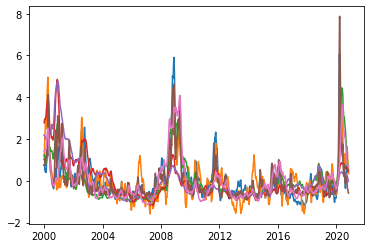

In [170]:
plt.plot(ff7vol.index, stats.zscore(ff7vol));

In [171]:
pca = PCA(n_components=5)
pca5 = pca.fit(stats.zscore(ff7vol))
np.round(pca5.explained_variance_ratio_,2)

array([0.69, 0.15, 0.06, 0.05, 0.03])

In [201]:
pca = PCA(n_components=1)
pca.fit(stats.zscore(ff7vol))
pca1_ts = stats.zscore(pca.transform(stats.zscore(ff7vol)))

for i in range(len(ff7vol.columns)):
    X = (pca1_ts)
    X = sm.add_constant(X)
    y = (ff7vol[ff7vol.columns[i]])

    GLS_pc1_col = sm.GLS(y,X)
    Fit_pc1_col = GLS_pc1_col.fit()
    print(ff7vol.columns[i])
    print(Fit_pc1_col.rsquared)
    print()

Mkt-RF
0.7271311865308653

SMB
0.6690043245039592

HML
0.7988284710966114

RMW
0.5935950008338342

CMA_x
0.4858135337801306

ST_Rev
0.8129796182400291

Mom   
0.7359601465681248



In [239]:
fmb = FMacBeth(r,ff7,rf)
fmb.TSRegression_step1()
fmb.CSRegression_step2()

In [255]:
(fmb.t_lambdas_FB.iloc[:,0]*10*252 - (fmb.t_lambdas_FB.iloc[:,0]*10*252).min()) * (0.7271311865308653/1.019333)

MKT    0.727131
SMB    0.863955
HML    0.358017
RMW    0.683694
CMA    0.386949
Rev    0.000000
Mom    2.154000
Name: 0, dtype: float64